In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\HOME\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
train=pd.read_csv('./train.csv')
train.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


In [4]:
train.shape

(84406, 20)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

In [6]:
train.columns

Index(['ID', '월', '요일', '시간', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림',
       '범죄발생지', 'TARGET'],
      dtype='object')

In [8]:
train.isna().sum()

ID         0
월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
TARGET     0
dtype: int64

In [9]:
train.duplicated().sum()

0

#### Dataset Info

84406개의 데이터

- ID : 샘플 별 고유 id
- 월 : 사건 발생월
- 요일 : 월요일 ~ 일요일
- 시간 : 사건 발생 시각
- 소관경찰서 : 사건 발생 구역의 담당 경찰서
- 소관지역 : 사건 발생 구역
- 사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리
- 강수량(mm) 
- 강설량(mm)
- 적설량(cm) 
- 풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
- 안개 : 가시거리가 1km 미만인 경우
- 짙은안개 : 가시거리가 200m 미만인 경우
- 번개
- 진눈깨비
- 서리
- 연기/연무 : 먼지, 연기가 하늘을 가리는 현상
- 눈날림
- 범죄발생지 : 범죄가 발생한 장소
- TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]
 

#### target 비율 확인

In [10]:
train['TARGET'].value_counts()

TARGET
0    36453
1    25397
2    22556
Name: count, dtype: int64

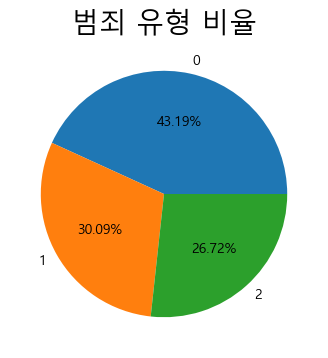

In [11]:
plt.subplots(figsize = (4,4))

target_freq = train['TARGET'].value_counts()

plt.pie(target_freq, labels = target_freq.index, autopct="%.2f%%")
plt.title('범죄 유형 비율', size=20)
plt.show()

In [12]:
# 강도, 절도 , 상해 중 
# 1. 강도 : 43%, 2. 절도 : 30%, 상해 : 26%

In [13]:
train.columns

Index(['ID', '월', '요일', '시간', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림',
       '범죄발생지', 'TARGET'],
      dtype='object')

In [14]:
train[['사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림']].describe()

,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921
std,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030
min,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
train.describe().style.background_gradient()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [16]:
# 수치형과 범주형을 나눠봤을 때
# 숫자라고 해서 모두 수치형 데이터가 아니라, 소관경찰서와 소관지역은 범주형 데이터라고 봐야 할 것 같음. 연속적인 데이터를 나타내는게 아니기 때문에


### 범주형 : 요일, 범죄발생지

In [17]:
#범주형 변수
category_col=train.select_dtypes(include=['object', 'category'])
category_col

,ID,요일,범죄발생지
0,TRAIN_00000,화요일,차도
1,TRAIN_00001,화요일,차도
2,TRAIN_00002,일요일,인도
3,TRAIN_00003,월요일,주거지
4,TRAIN_00004,일요일,주유소
...,...,...,...
84401,TRAIN_84401,일요일,차도
84402,TRAIN_84402,목요일,차도
84403,TRAIN_84403,일요일,차도
84404,TRAIN_84404,화요일,주거지


#### 수치형 : 월, 시간, 사건발생지 ,강수량~눈날림

In [18]:
numerical_columns = train.select_dtypes(include=['int64', 'float64'])
numerical_columns


,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
0,9,10,137,8.0,2.611124,0.000000,0.0,0.00,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,11,6,438,13.0,3.209093,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,8,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,5,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,9,11,1439,41.0,1.789721,0.000000,0.0,0.00,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,4,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
84402,8,12,2149,38.0,1.458490,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
84403,7,6,29,46.0,2.944913,105.888889,0.0,0.00,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
84404,1,11,536,25.0,0.493679,2.285714,8.6,10.75,330.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1


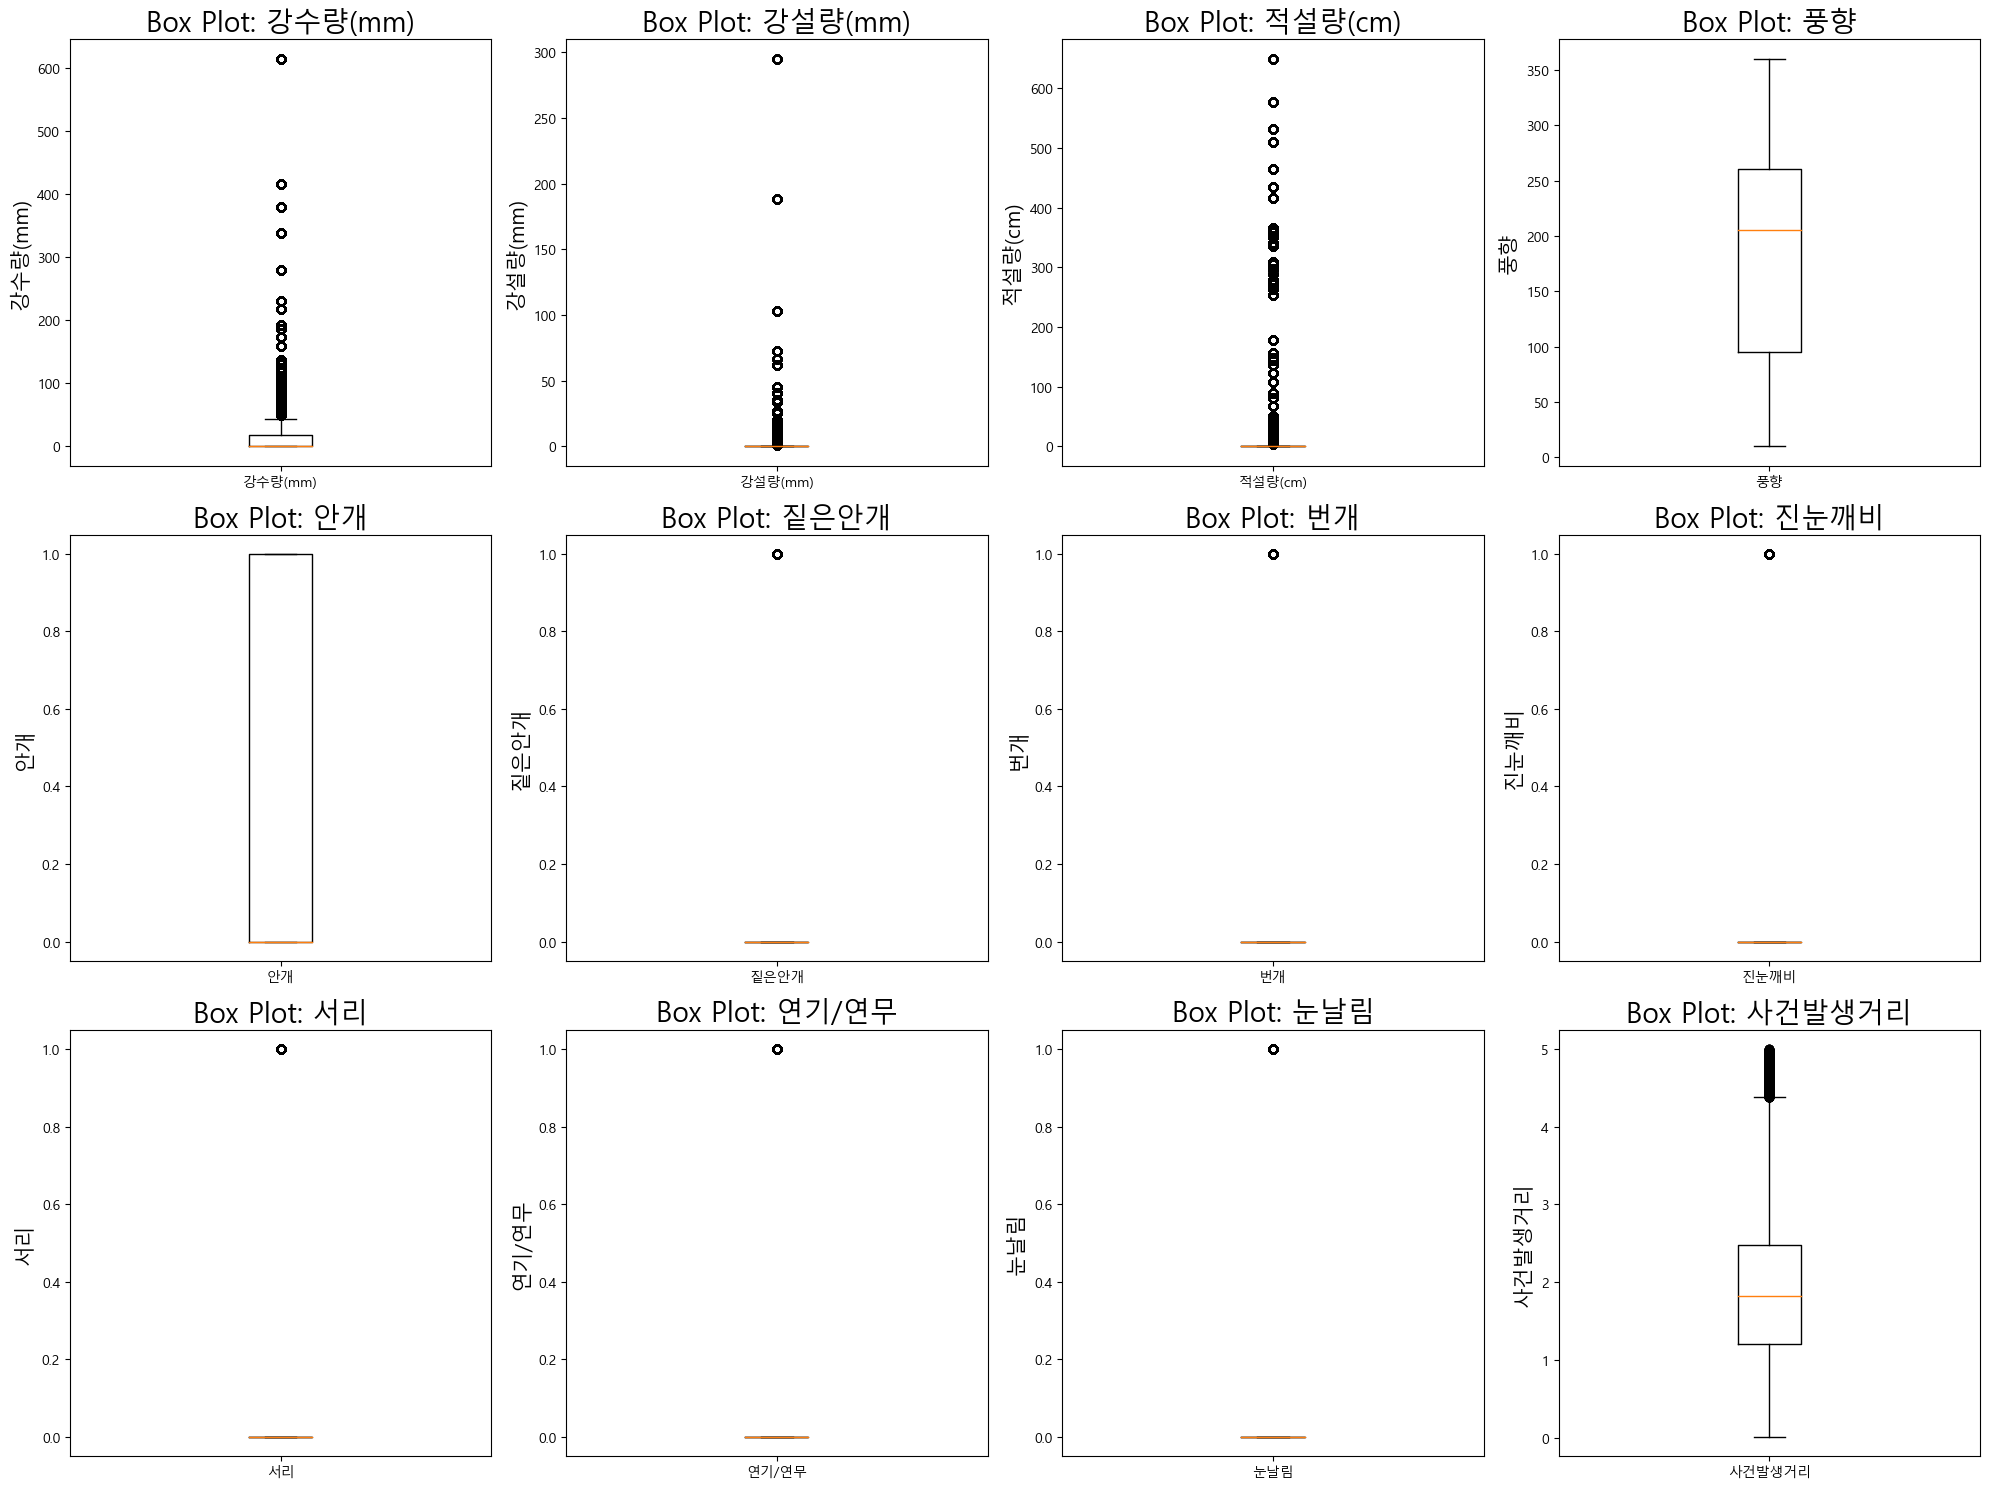

In [19]:

fig, axs = plt.subplots(3, 4, figsize=(20, 15), dpi=100)

continuous_features = ['강수량(mm)', '강설량(mm)', '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림','사건발생거리']

for i, weather_feature in enumerate(continuous_features):
    row = i // 4
    col = i % 4

    axs[row, col].set_title("Box Plot: " + weather_feature, fontsize=20)

    # Box plot for the current weather feature
    axs[row, col].boxplot(train[weather_feature], labels=[weather_feature], showfliers=True)

    axs[row, col].set_ylabel(weather_feature, fontsize=15)

fig.tight_layout()
plt.show()


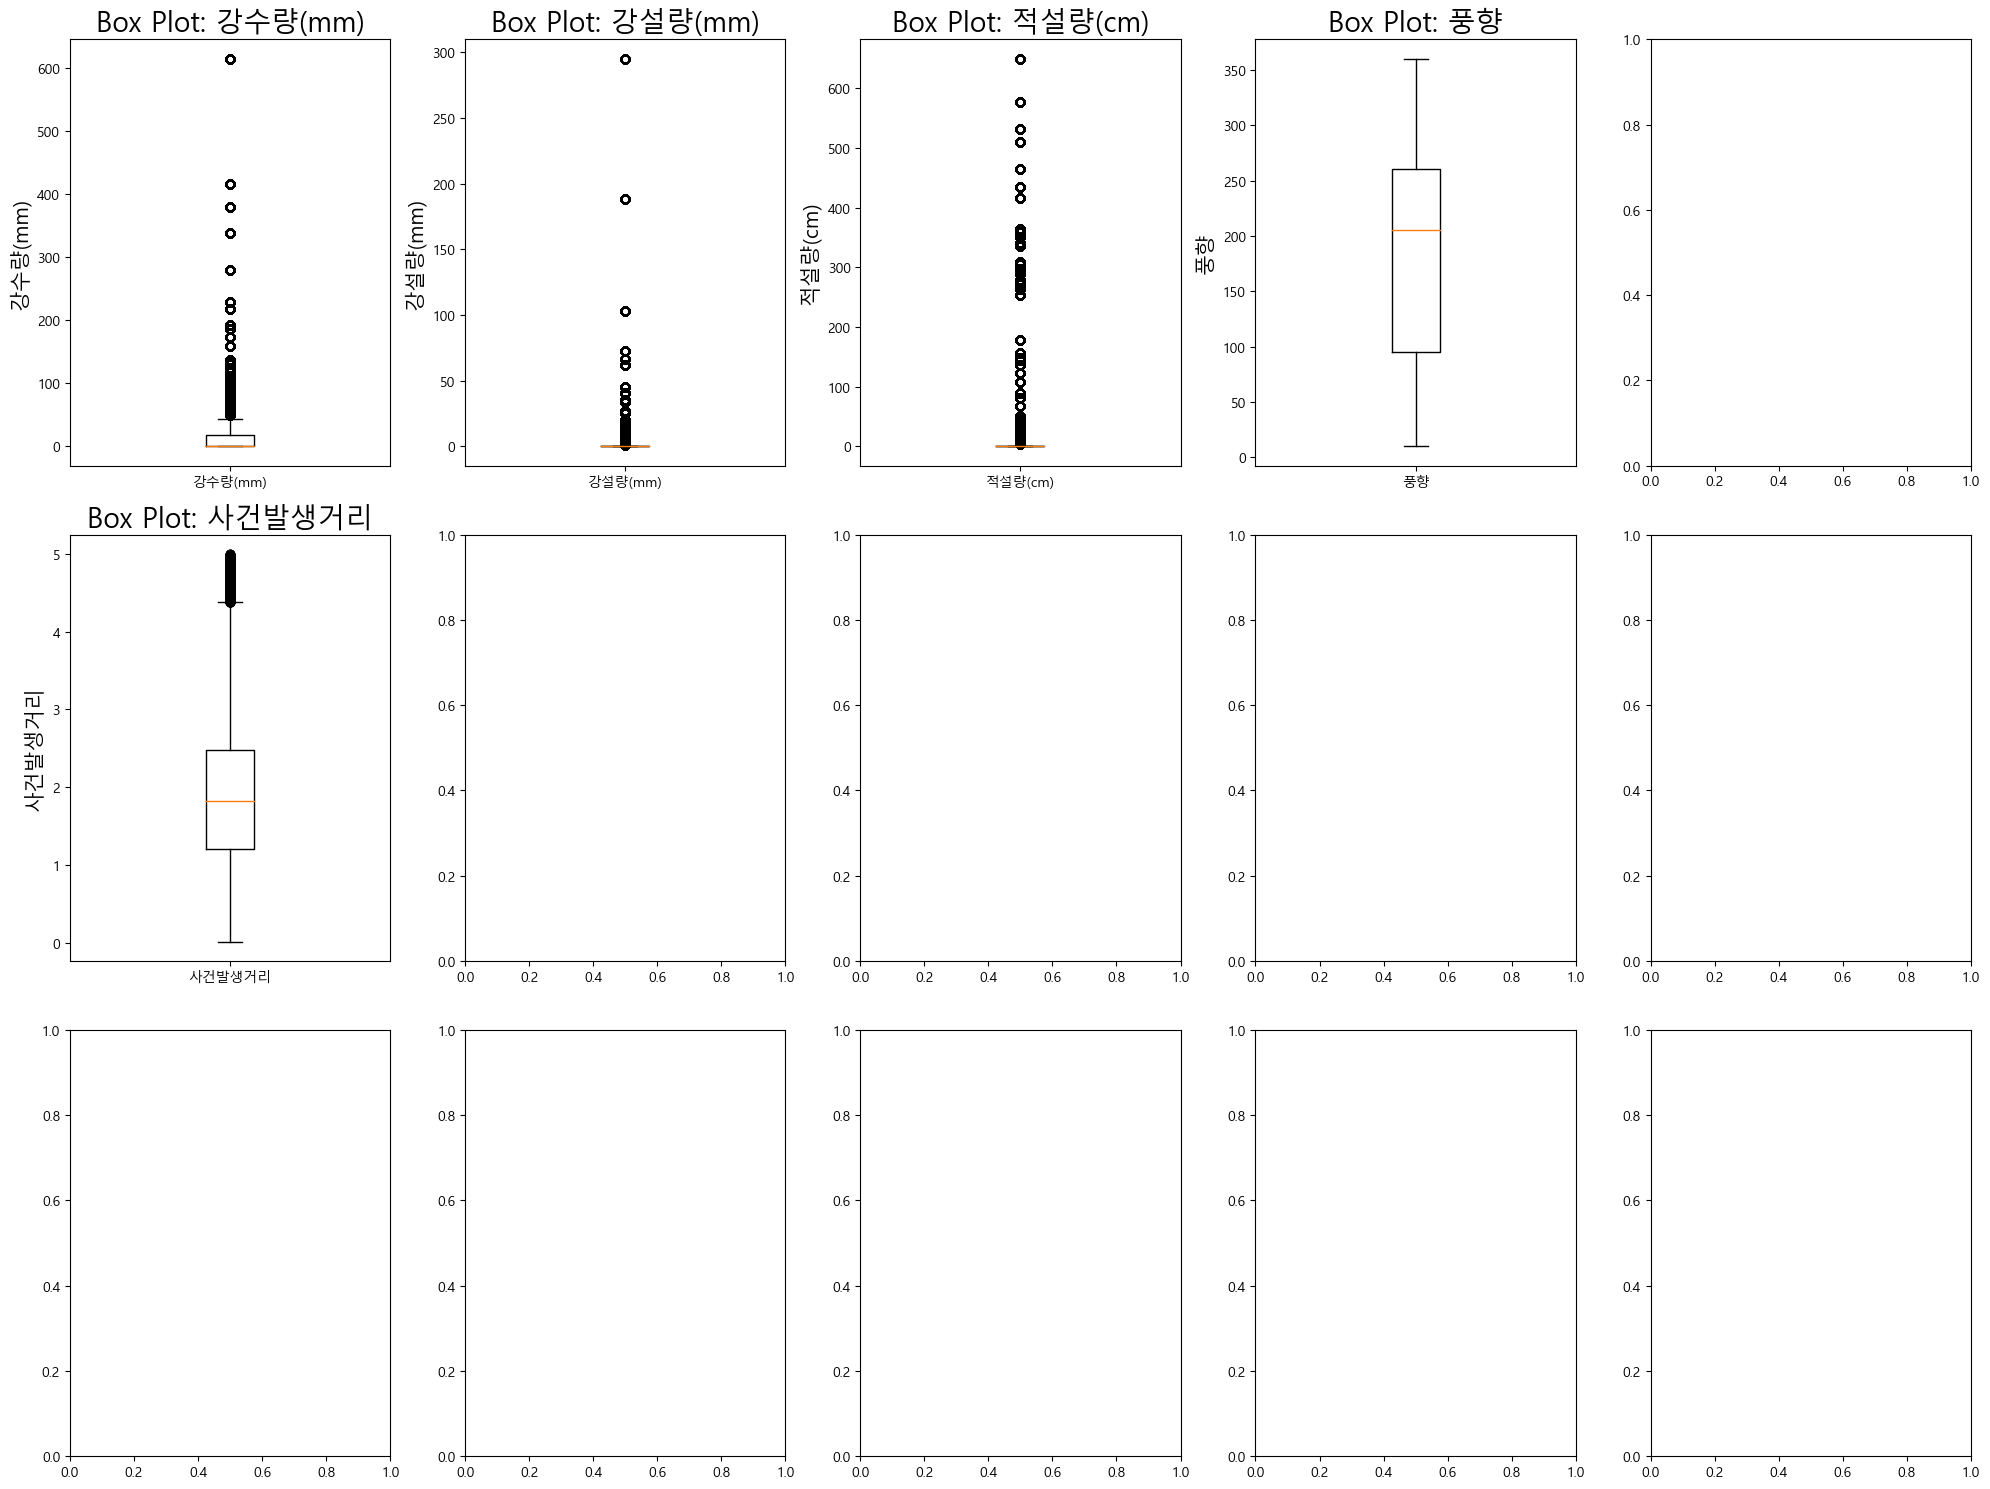

In [20]:
fig, axs = plt.subplots(3,5, figsize=(20, 15), dpi=100)

continuous_features = ['강수량(mm)', '강설량(mm)', '적설량(cm)','풍향','사건발생거리']

for i, weather_feature in enumerate(continuous_features):
    row = i // 4
    col = i % 4

    axs[row, col].set_title("Box Plot: " + weather_feature, fontsize=20)

    # Box plot for the current weather feature
    axs[row, col].boxplot(train[weather_feature], labels=[weather_feature], showfliers=True)

    axs[row, col].set_ylabel(weather_feature, fontsize=15)

fig.tight_layout()
plt.show()


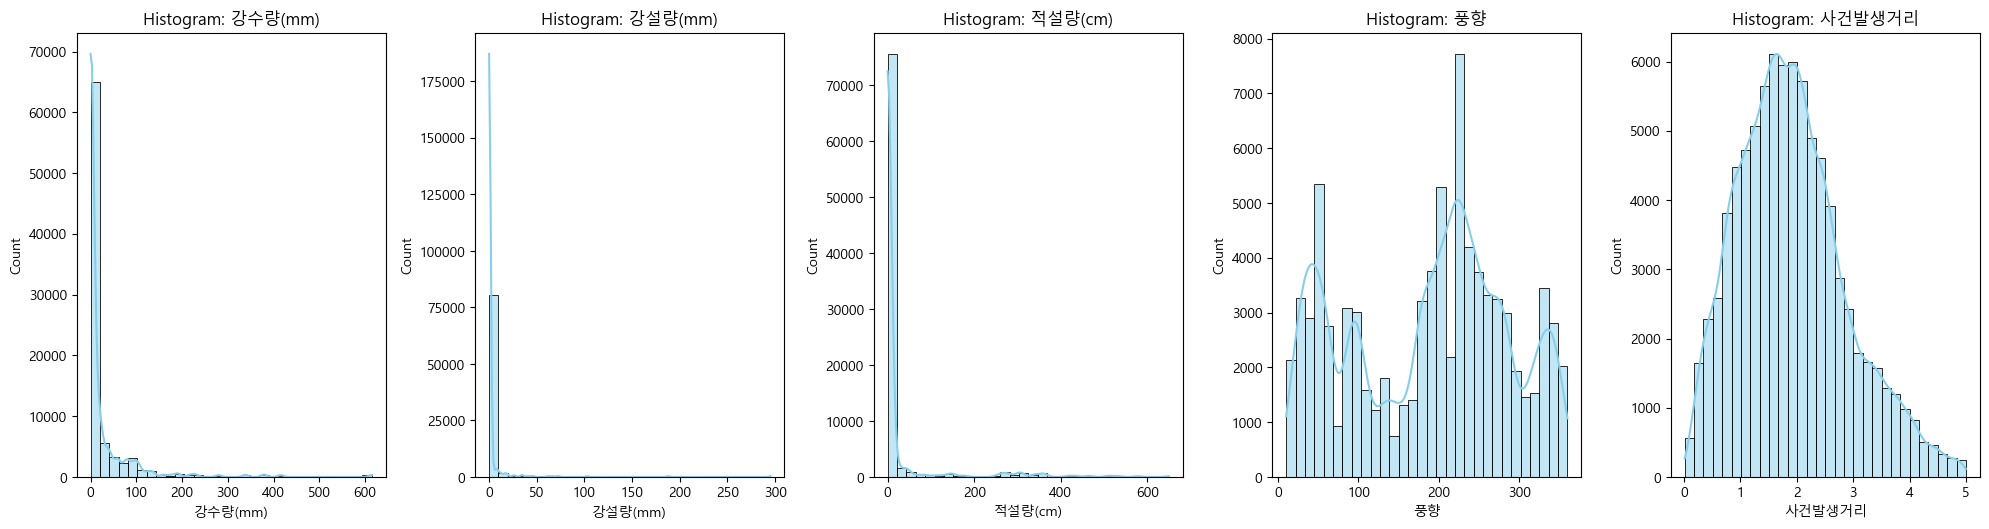

In [21]:
# 분포도 확인

plt.figure(figsize=(20, 15))


for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 5, i)
    sns.histplot(train[feature], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title("Histogram: " + feature)
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

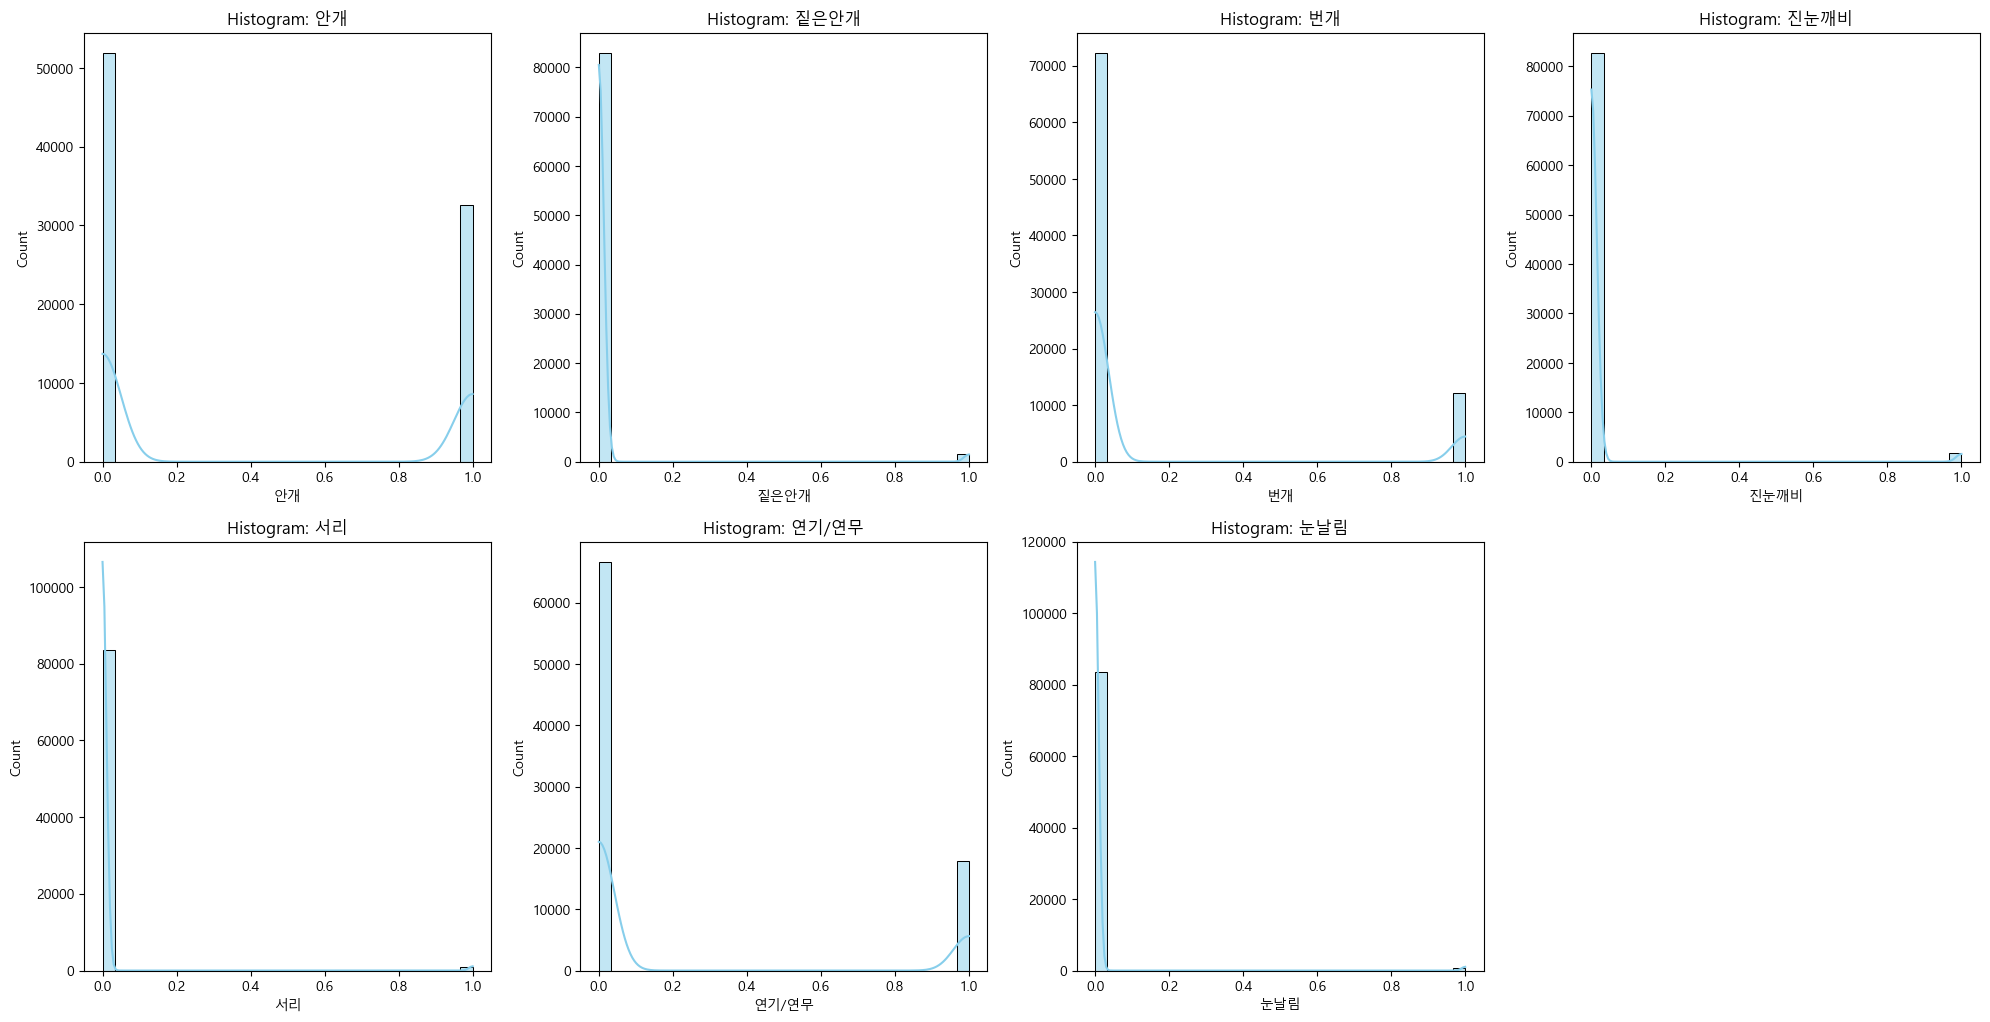

In [22]:
# 범주형 날씨 변수 분포도

cat_weather=['안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림']
plt.figure(figsize=(20, 15))


for i, feature in enumerate(cat_weather, 1):
    plt.subplot(3, 4, i)
    sns.histplot(train[feature], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title("Histogram: " + feature)
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# 날씨형 변수들 중 '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림' 는 0과 1로 구분되어 있음

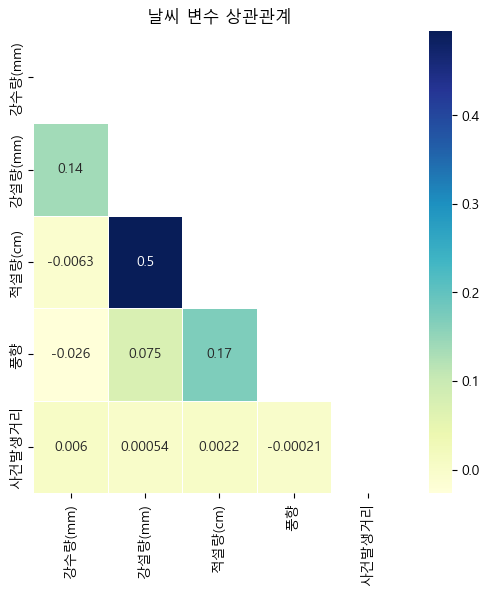

In [23]:
#수치형 변수들 간의 상관관계 확인
#  '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림',
continuous_features = ['강수량(mm)', '강설량(mm)', '적설량(cm)', '풍향','사건발생거리']

weather_corr=train[continuous_features].corr()

mask=np.zeros_like(weather_corr)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(6,6))
sns.heatmap(weather_corr,annot=True,cmap='YlGnBu',linewidths=0.5,mask=mask)
plt.title('날씨 변수 상관관계')
plt.show()


In [ ]:
#0과 로 구분되어있는 변수들을 제외한 수치형 변수들 간의 상관계수를 봤을 때, 적설량과 강수량 사이에 양의 상관관계 있는 것을 확인

#### 요일별 사건 전체 건수

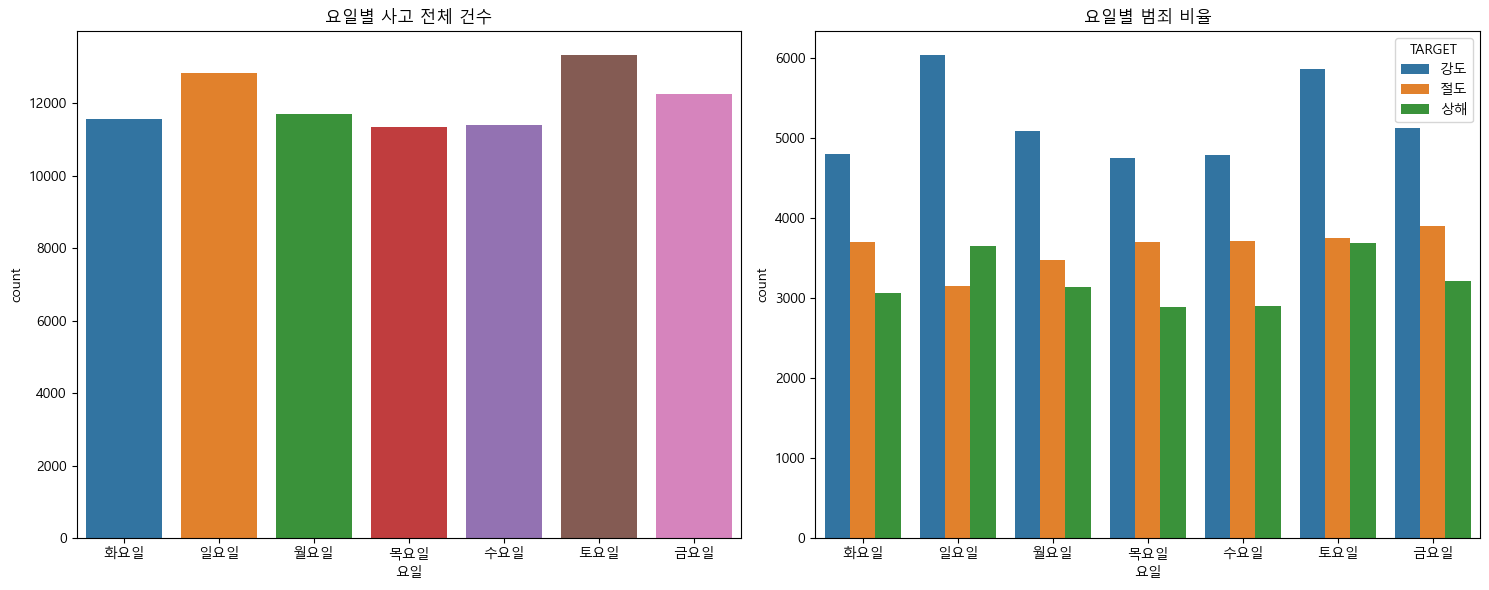

In [24]:
plt.figure(figsize=(15, 6))

# 요일별 사고 전체 건수
plt.subplot(1, 2, 1)
sns.countplot(x='요일', data=train)
plt.title('요일별 사고 전체 건수')

# 요일별 범죄 비율
plt.subplot(1, 2, 2)
sns.countplot(x='요일', hue='TARGET', data=train)
plt.title('요일별 범죄 비율')
plt.legend(title='TARGET', loc='upper right', labels=['강도', '절도', '상해'])

plt.tight_layout()  
plt.show()

#### 월별 범죄 현황

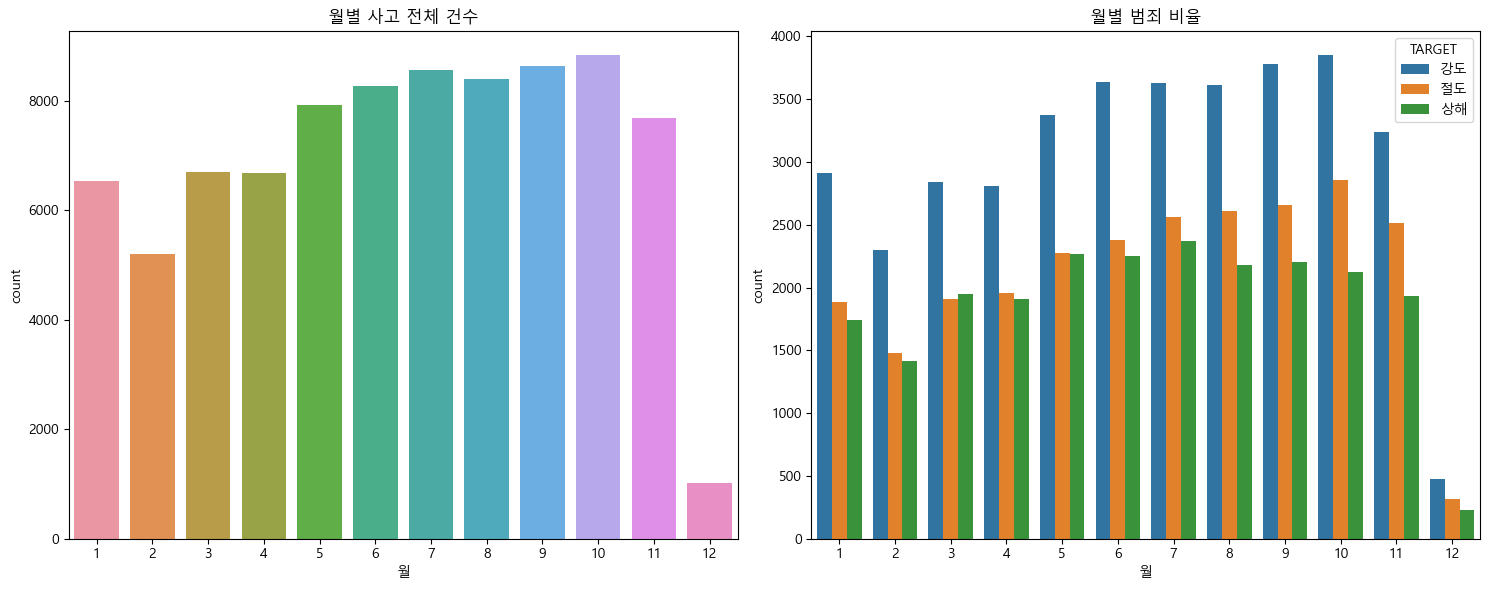

In [25]:
plt.figure(figsize=(15, 6))

#월별 사고 전체 건수
plt.subplot(1, 2, 1)
sns.countplot(x='월', data=train)
plt.title('월별 사고 전체 건수')

# 월별 범죄 비율
plt.subplot(1, 2, 2)
sns.countplot(x='월', hue='TARGET', data=train)
plt.title('월별 범죄 비율')
plt.legend(title='TARGET', loc='upper right', labels=['강도', '절도', '상해'])

plt.tight_layout()  

#### 시간별 범죄 현황

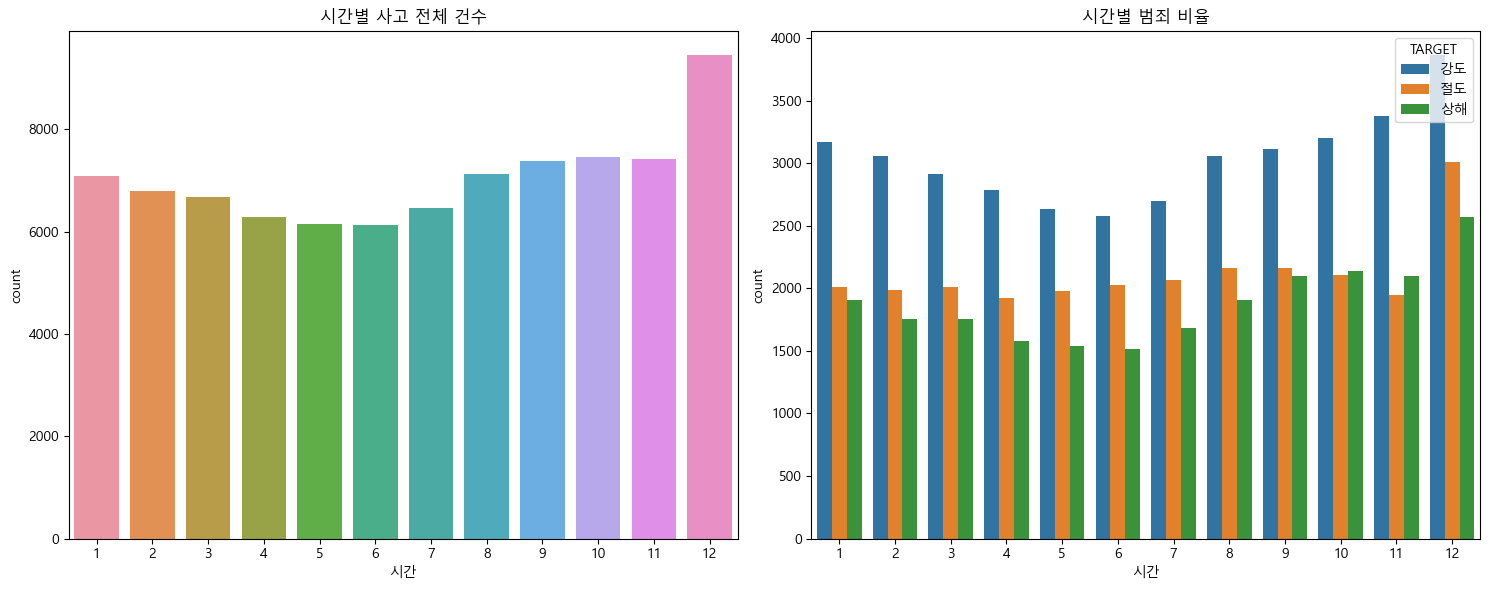

In [26]:
plt.figure(figsize=(15, 6))

#시간별 사고 전체 건수
plt.subplot(1, 2, 1)
sns.countplot(x='시간', data=train)
plt.title('시간별 사고 전체 건수')

# 시간별 범죄 비율
plt.subplot(1, 2, 2)
sns.countplot(x='시간', hue='TARGET', data=train)
plt.title('시간별 범죄 비율')
plt.legend(title='TARGET', loc='upper right', labels=['강도', '절도', '상해'])

plt.tight_layout()  

#### 범죄 발생지별 범죄 발생 현황

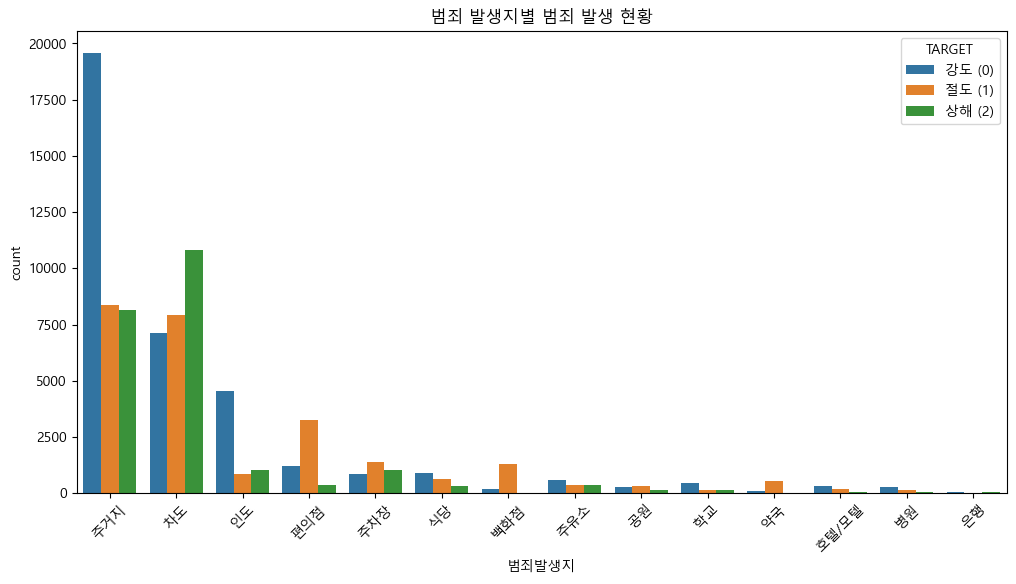

In [27]:
# 범죄 발생지별 범죄 발생 현황

plt.figure(figsize=(12, 6))
sns.countplot(x='범죄발생지', data=train, hue='TARGET', order=train['범죄발생지'].value_counts().index)
plt.title('범죄 발생지별 범죄 발생 현황')
plt.legend(title='TARGET', loc='upper right', labels=['강도 (0)', '절도 (1)', '상해 (2)'])
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


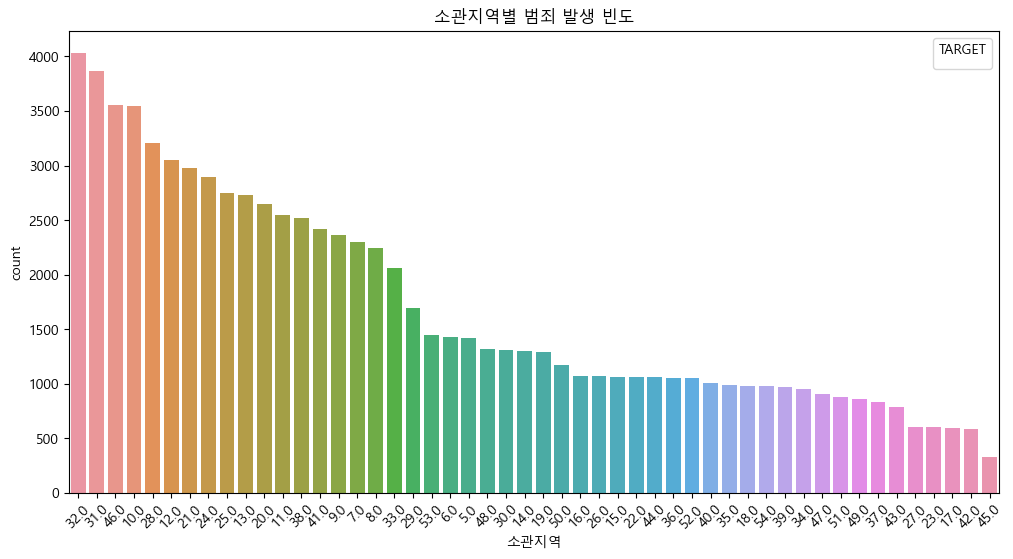

In [28]:
# Count plot for '범죄발생지'
# '소관경찰서', '소관지역', '사건발생거리'
plt.figure(figsize=(12, 6))
sns.countplot(x='소관지역', data=train, order=train['소관지역'].value_counts().index)
plt.title('소관지역별 범죄 발생 빈도')
plt.legend(title='TARGET', loc='upper right')
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


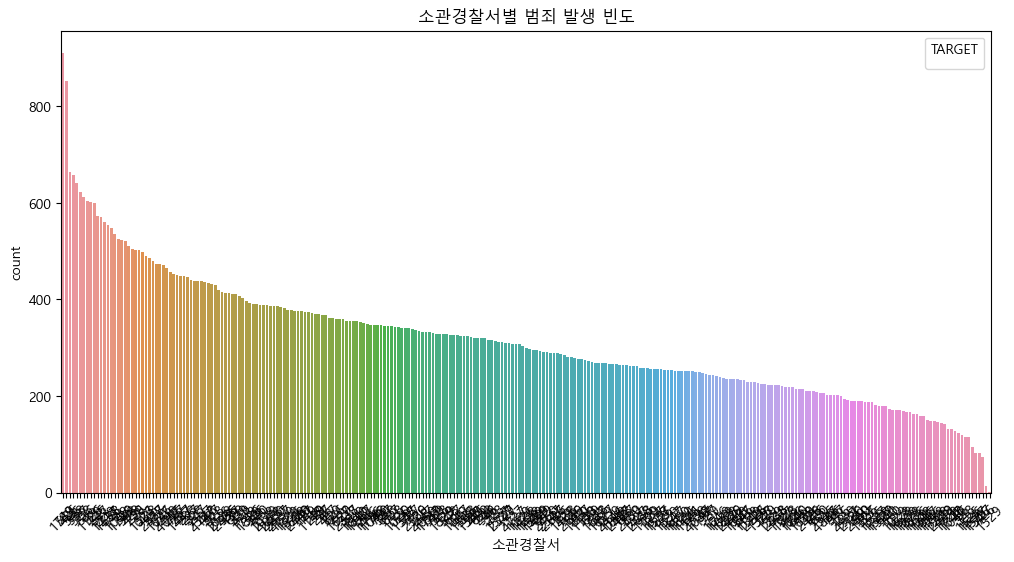

In [29]:
# Count plot for '범죄발생지'
# '소관경찰서', '소관지역', '사건발생거리'
plt.figure(figsize=(12, 6))
sns.countplot(x='소관경찰서', data=train, order=train['소관경찰서'].value_counts().index)
plt.title('소관경찰서별 범죄 발생 빈도')
plt.legend(title='TARGET', loc='upper right')
plt.xticks(rotation=45)
plt.show()

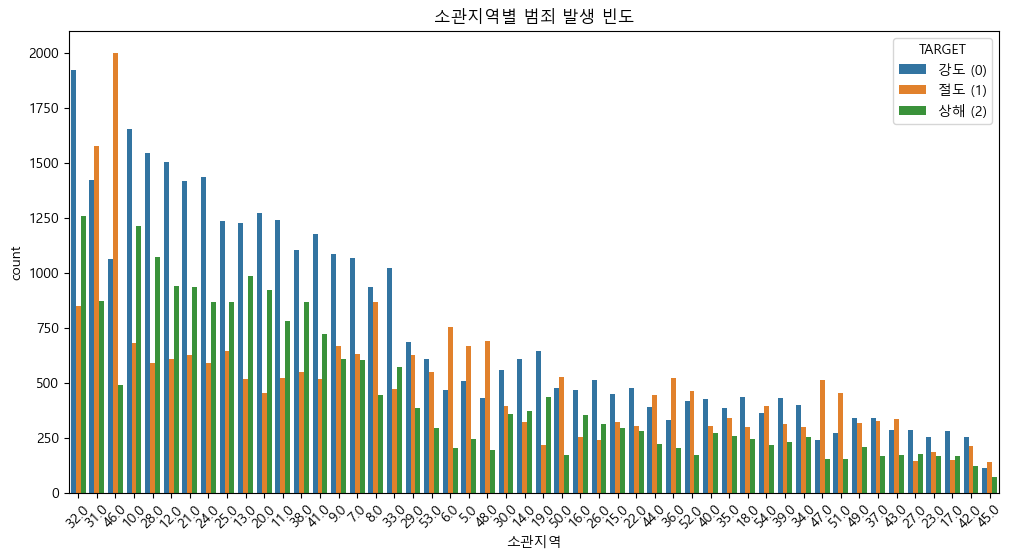

In [30]:

# Count plot for '범죄발생지'
# '소관경찰서', '소관지역', '사건발생거리'
plt.figure(figsize=(12, 6))
sns.countplot(x='소관지역', data=train, hue='TARGET', order=train['소관지역'].value_counts().index)
plt.title('소관지역별 범죄 발생 빈도')
plt.legend(title='TARGET', loc='upper right', labels=['강도 (0)', '절도 (1)', '상해 (2)'])
plt.xticks(rotation=45)
plt.show()

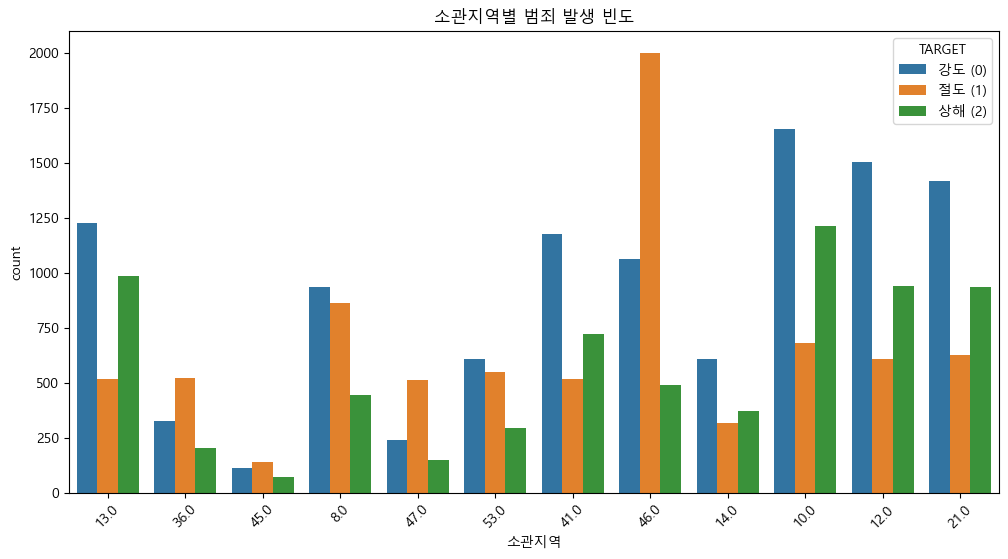

In [31]:
# Count plot for '범죄발생지'
# '소관경찰서', '소관지역', '사건발생거리'
plt.figure(figsize=(12, 6))
sns.countplot(x='소관지역', data=train, hue='TARGET', order=train['소관지역'][:15].value_counts().index)
plt.title('소관지역별 범죄 발생 빈도')
plt.legend(title='TARGET', loc='upper right', labels=['강도 (0)', '절도 (1)', '상해 (2)'])
plt.xticks(rotation=45)
plt.show()